In [1]:
# Example 1: Manual calculation of simple linear regression

# Sample data
X = [1, 2, 3, 4, 5]
Y = [2, 4, 5, 4, 5]

# Step 1: Calculate means
mean_x = sum(X) / len(X)
mean_y = sum(Y) / len(Y)

# Step 2: Calculate b1 (slope)
numerator = sum((x - mean_x) * (y - mean_y) for x, y in zip(X, Y))
denominator = sum((x - mean_x) ** 2 for x in X)
b1 = numerator / denominator

# Step 3: Calculate b0 (intercept)
b0 = mean_y - b1 * mean_x

# Print coefficients
print(f"Intercept (b0): {b0}")
print(f"Slope (b1): {b1}")

# Step 4: Make a prediction
x_new = 6
y_pred = b0 + b1 * x_new
print(f"Predicted Y for X={x_new}: {y_pred}")


Intercept (b0): 2.2
Slope (b1): 0.6
Predicted Y for X=6: 5.8


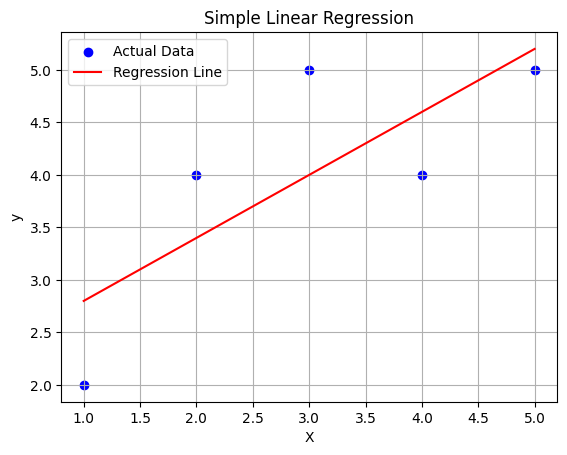

In [2]:
# Example 2: Using sklearn for simple linear regression

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshaped to 2D
y = np.array([2, 4, 5, 4, 5])

# Model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Plotting
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


# Example 3: Simple linear regression with dataset (placement_CGPA_LPA.csv)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
# Load dataset
df = pd.read_csv('/content/placement_CGPA_LPA.csv')
df.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


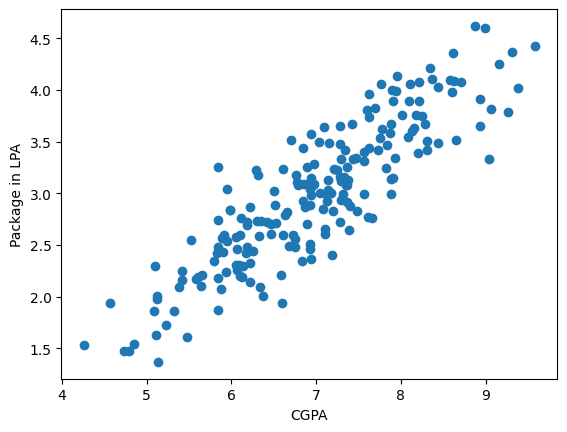

In [6]:
# Scatter plot
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel("Package in LPA")
plt.show()

In [7]:

# Split into features and target
x = df.iloc[:, 0:1]  # CGPA
y = df.iloc[:, -1]   # Package

In [8]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [9]:
# Train model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [10]:

# Prediction example
print(lr.predict(x_test.iloc[2].values.reshape(1, 1)))

[2.38464568]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


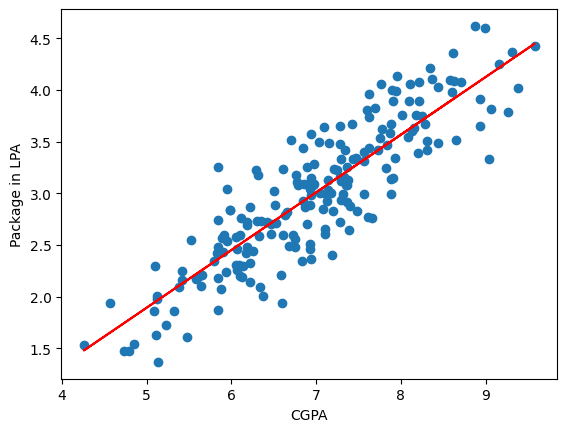

In [11]:

# Plot regression line
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_train, lr.predict(x_train), color='red')
plt.xlabel('CGPA')
plt.ylabel("Package in LPA")
plt.show()

In [12]:
# Coefficients
m = lr.coef_
b = lr.intercept_
print("Slope (m):", m)
print("Intercept (b):", b)

Slope (m): [0.55795197]
Intercept (b): -0.8961119222429144


In [13]:
# Example 4: Multiple Linear Regression (Normal Equation)

import numpy as np

# Sample dataset [Experience, CGPA]
X = np.array([
    [1, 6.5],
    [2, 7.0],
    [3, 7.5]
])

# Target values (Salaries)
y = np.array([
    [30000],
    [35000],
    [40000]
])

# Step 1: Add intercept term
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Step 2: Apply Normal Equation
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Output coefficients
print("Intercept (b0):", theta[0][0])
print("Coefficient for Experience (b1):", theta[1][0])
print("Coefficient for CGPA (b2):", theta[2][0])


Intercept (b0): 21250.0
Coefficient for Experience (b1): 4375.0
Coefficient for CGPA (b2): -1562.5


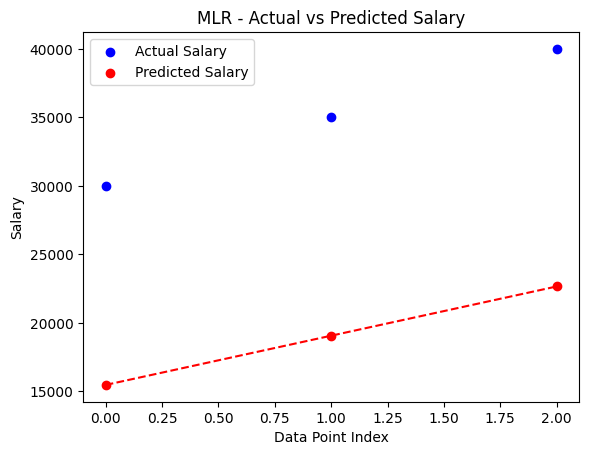

In [14]:
# Example 5: MLR with regression line (plotting actual vs predicted)

import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([
    [1, 6.5],
    [2, 7.0],
    [3, 7.5]
])
y = np.array([
    [30000],
    [35000],
    [40000]
])

# Add intercept term
X_b = np.hstack([np.ones((X.shape[0], 1)), X])

# Compute coefficients
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# Predict y values
y_pred = X_b @ theta

# X-axis for plotting
x_idx = np.arange(len(y))

# Plotting
plt.scatter(x_idx, y, color='blue', label='Actual Salary')
plt.scatter(x_idx, y_pred, color='red', label='Predicted Salary')
plt.plot(x_idx, y_pred, color='red', linestyle='--')

plt.xlabel('Data Point Index')
plt.ylabel('Salary')
plt.title('MLR - Actual vs Predicted Salary')
plt.legend()
plt.show()
